In [57]:
import pandas as pd
import seaborn as sns 
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.stats import sem

%matplotlib inline
%config Completer.use_jedi = False


#import required sklearn for logistic regression classifier

import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix,roc_auc_score, f1_score, plot_roc_curve,roc_curve, auc
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold, RepeatedKFold, cross_validate
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold, SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [28]:
#Load the filtered cisform switch file and the file containing all genes for BRCA
#Only matched samples / files used

cis_95_file = '/Users/jake/OneDrive - University of Glasgow/Project/BRCA/Survival/BRCA_cis_95_survival.csv'
all_genes_file = '/Users/jake/OneDrive - University of Glasgow/Project/BRCA/Survival/BRCA_all_genes_survival.csv'

all_genes_survival = pd.read_csv(all_genes_file,header=[0,1],sep='\t',index_col=[0])
cis_95 = pd.read_csv(cis_95_file,header=[0,1],sep='\t',index_col=[0])

In [29]:
cis_95

Gene_symbol,ZNF117,BTN3A2,TYW1,C2orf74,ZNF781,ZSCAN23,NUDT2,GYPE,WFDC3,MANBA,...,RNASET2,PAX8,SLC5A11,MAATS1,NDUFA10,SNX16,PNPT1,TMEM115,UPK3B,Three_year_status
Gene_ensembl_id,ENSG00000152926,ENSG00000186470,ENSG00000198874,ENSG00000237651,ENSG00000196381,ENSG00000187987,ENSG00000164978,ENSG00000197465,ENSG00000124116,ENSG00000109323,...,ENSG00000026297,ENSG00000125618,ENSG00000158865,ENSG00000183833,ENSG00000130414,ENSG00000104497,ENSG00000138035,ENSG00000126062,ENSG00000243566,Three_year_status
TCGA-BH-A1FN,7.120216,4.985915,7.126943,0.460833,0.479443,0.233240,8.484795,0.089906,0.636779,8.392460,...,6.479719,0.143041,0.428664,1.324786,6.583425,2.960510,10.835174,11.768108,0.084667,1
TCGA-E9-A1NG,1.433767,8.839503,5.993562,1.198498,0.560200,0.112217,10.685053,0.190402,0.519732,8.067247,...,6.713850,0.652537,0.015411,0.631393,8.841204,2.485926,5.548466,22.074770,0.103874,0
TCGA-AR-A5QQ,1.203197,9.740210,2.741147,0.837896,0.116986,0.025777,17.063258,0.179474,0.826921,4.892384,...,5.732810,0.694746,0.012391,0.023819,8.156408,1.624627,6.424533,28.273353,0.485176,0
TCGA-AR-A24L,2.676938,5.113456,6.424086,1.248896,0.236878,0.195733,20.999091,0.195956,0.242450,7.417486,...,3.247821,0.832990,0.118476,3.893493,9.007728,3.402171,9.044260,17.072526,0.174472,1
TCGA-AC-A23H,1.527223,1.443108,5.757805,0.447189,0.074923,0.053655,16.385836,0.094659,0.191557,11.752712,...,5.295477,0.554810,0.210290,0.404245,12.745408,2.310231,7.199830,19.680244,0.081503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AR-A2LH,3.434876,5.810295,6.758380,1.020777,0.246389,0.119760,21.091085,0.326989,0.294266,6.061226,...,8.638843,0.173562,0.084429,0.287714,9.518422,3.354613,8.122797,23.109516,0.226640,0
TCGA-B6-A0IN,2.807324,6.123478,4.525008,2.184523,0.390220,0.093891,12.359890,0.202386,0.229352,2.242073,...,8.944784,0.192926,0.047506,0.194059,10.988272,1.738462,3.270572,33.480400,5.842827,1
TCGA-B6-A0IK,2.210504,6.347181,7.262139,0.559040,0.241710,0.033288,10.064225,0.231763,0.602080,4.718078,...,7.249327,0.025844,0.808024,0.173014,15.094340,4.207761,6.508250,14.959917,0.903846,0


In [30]:
#Check cisform_switch for and missing data

cis_95.isnull().sum().unique()

array([0])

In [31]:
#Check all genes file for missing data

all_genes_survival.isnull().sum().sort_values(ascending = False)
all_genes_survival.isnull().sum().unique()


array([0])

In [32]:
#Check three year survival ratio ... since almost equal will not use 'class_weight' in model

survival_ratio = sum(cis_95['Three_year_status','Three_year_status']==1) / sum(cis_95['Three_year_status','Three_year_status']==0)
survival_ratio

1.1549295774647887

In [33]:
#Do an initial train test split to extract an 'unseen' test set of data (30%) for both cisform and all genes
#Set stratify as y to keep same ratio in test data

X_full_cis = cis_95.drop('Three_year_status',axis=1,level=0)
y_full_cis = cis_95['Three_year_status','Three_year_status']

X_develop_cis, X_test_cis, y_develop_cis, y_test_cis = train_test_split(X_full_cis, y_full_cis, test_size=0.3, random_state=60,stratify=y_full_cis)


In [34]:
#Repeat for all genes .. using random sample of same number of genes as cis eQTLs

X_full_all = all_genes_survival.drop('Three_year_status',axis=1,level=0)
y_full_all = all_genes_survival['Three_year_status','Three_year_status']

#Take a random sample of genes 5 seperate times .. use X_full_iso.columns to acquire same num of genes as isoform
X_random_1 = X_full_all.sample(n=len(X_full_cis.columns),axis=1)
X_random_2 = X_full_all.sample(n=len(X_full_cis.columns),axis=1)
X_random_3 = X_full_all.sample(n=len(X_full_cis.columns),axis=1)

#Change random state for each 
X_develop_ran_1, X_test_ran_1, y_develop_ran_1, y_test_ran_1 = train_test_split(X_random_1, y_full_all, test_size=0.3, random_state=1,stratify=y_full_all)
X_develop_ran_2, X_test_ran_2, y_develop_ran_2, y_test_ran_2 = train_test_split(X_random_2, y_full_all, test_size=0.3, random_state=2,stratify=y_full_all)
X_develop_ran_3, X_test_ran_3, y_develop_ran_3, y_test_ran_3 = train_test_split(X_random_3, y_full_all, test_size=0.3, random_state=44,stratify=y_full_all)




In [35]:
#First do simple Logistic Regression with gridsearch to determine optimal parameters

def grid_search_LR(X,y):
    '''Perform logistic regression grid search. Supply development X and y data.'''

    #Logistic Regression with dual = False since n_samples > n_features
    classifier = LogisticRegression(dual=False)
    
    #Want to add PCA to pipeline
    pca = PCA(n_components=10)

    #Pipeline containing Log Reg classifier and Log Reg with deafault settings for feature engineering
    #Also added scaler as error related to iterations / convergance appears, which can be due to 'poor scaling'
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',pca),
                                  ('feature_selection', SelectFromModel(LogisticRegression(dual=False))),
                                  ('classifier',classifier)])


    #Two dictionaries of potential potential parameters to account for penalties and solvers that can/can't go togther
    #The PCA searches from 1 upto max number of features / genes in 5 steps (since can't search PC's more than max num of features)
    param_grid = [
        {'classifier__penalty': ['l1'], 'classifier__solver': ['liblinear', 'saga'],
         'classifier__C':[0.01,0.1,1,10,100]},
        {'classifier__penalty': ['l2'], 'classifier__solver': ['liblinear', 'sag', 'saga','newton-cg'],
         'classifier__C':[0.01,0.1,1,10,100]}
    ]


    #Use repeated stratified k fold to maintian ratio between tumor and normal and do multliple splits of data
    r_stratkfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

    grid_search = GridSearchCV(LR_pipeline, param_grid=param_grid, scoring="roc_auc",cv=r_stratkfold)

    #Fit on development data
    grid_search.fit(X, y)
    
    #Create dictinoary to store the best parameters
    best_params = {}
    
    for k,v in grid_search.best_params_.items():
        
        best_params[k] = v
 
    #Return the best_params dictinoary => run this fuction and save as new variable in relation to what X and y run
    return best_params

In [36]:
#Run the gridsearch for both the cisform and all genes development data to create dictionaries to plug into CV

best_params_cis = grid_search_LR(X_develop_cis,y_develop_cis)
best_params_cis

{'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [37]:
best_params_ran_1 = grid_search_LR(X_develop_ran_1,y_develop_ran_1)
best_params_ran_2 = grid_search_LR(X_develop_ran_2,y_develop_ran_2)
best_params_ran_3 = grid_search_LR(X_develop_ran_3,y_develop_ran_3)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarni

In [38]:
#Now define model functions that will return cross_validate to evalaute model overall

In [39]:
# Create a function that cross validates the data

def LR_model_cv(X, y, best_params_dict, repeats = 3, splits = 3):
    '''LR model function. Takes in X and y development data, repeats, splits and the required best_params dictinoary'''

    #First perform RepeatedStratifiedKFold
    r_stratkfold = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats)
    
    # Create classifier with LR model using best_params_cis from gridsearch
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    #Create pipleine with scaling, feature selection (set as classifier to add best parameters) and the classifier
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier)),
                                   ('classifier',classifier)])
    
    
    # evaluate the cross_validate
    scores_cv = cross_validate(LR_pipeline, X, y, cv=r_stratkfold,
                            scoring=('f1_weighted','roc_auc','balanced_accuracy','precision_weighted','recall_weighted'))
    
    #Define performance metrics to return 
    F1 = str(f"Mean F1 weighted = {scores_cv['test_f1_weighted'].mean():.3f} SEM = {sem(scores_cv['test_f1_weighted']):.3f}")
    ROCAUC = str(f"Mean ROCAUC score = {scores_cv['test_roc_auc'].mean():.3f} SEM = {sem(scores_cv['test_roc_auc']):.3f} ")
    Accuracy = str(f"Mean balanced accuracy score = {scores_cv['test_balanced_accuracy'].mean():.3f} SEM = {sem(scores_cv['test_balanced_accuracy']):.3f} ")
    Precision = str(f"Mean weighted precision = {scores_cv['test_precision_weighted'].mean():.3f} SEM = {sem(scores_cv['test_precision_weighted']):.3f} ")
    Recall = str(f"Mean weighted recall = {scores_cv['test_recall_weighted'].mean():.3f} SEM = {sem(scores_cv['test_recall_weighted']):.3f} ")
    
    return F1, ROCAUC, Accuracy, Precision, Recall

In [40]:
#Compare the two cross validations with 3 repeats and 3 splits

LR_model_cv(X_develop_cis,y_develop_cis,best_params_cis)

('Mean F1 weighted = 0.532 SEM = 0.016',
 'Mean ROCAUC score = 0.511 SEM = 0.021 ',
 'Mean balanced accuracy score = 0.536 SEM = 0.018 ',
 'Mean weighted precision = 0.541 SEM = 0.019 ',
 'Mean weighted recall = 0.536 SEM = 0.017 ')

In [41]:
LR_model_cv(X_develop_ran_1,y_develop_ran_1,best_params_ran_1)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


('Mean F1 weighted = 0.553 SEM = 0.016',
 'Mean ROCAUC score = 0.590 SEM = 0.030 ',
 'Mean balanced accuracy score = 0.555 SEM = 0.016 ',
 'Mean weighted precision = 0.561 SEM = 0.017 ',
 'Mean weighted recall = 0.561 SEM = 0.016 ')

In [42]:
#Now create models utilising the above parameters to perform a test on the unseeen test data

In [43]:
# Create function to perform test

def LR_model_test(X_develop,y_develop,X_test,y_test, best_params_dict):
    '''Function fits the predetermined LR_pipeline for the data before predicting on the unseen test data'''
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier)),
                                   ('classifier',classifier)])
    
    #Fit on the develop data
    LR_pipeline.fit(X_develop,y_develop)
    
    #Then make predictions on the unseen test data from the initial train test split
    predictions = LR_pipeline.predict(X_test)
    
    #Return classification report and ROCAUC score
    print (classification_report(predictions,y_test,target_names=['Desceased Before - 0','Deceased After - 1']))
    
    ROCAUC =  round(roc_auc_score(predictions,y_test),2)
    
    return ROCAUC

In [44]:
#Now run on both set of data to compare the results

In [45]:
LR_model_test(X_develop_cis,y_develop_cis,X_test_cis,y_test_cis,best_params_cis)

                      precision    recall  f1-score   support

Desceased Before - 0       0.71      0.56      0.63        27
  Deceased After - 1       0.52      0.68      0.59        19

            accuracy                           0.61        46
           macro avg       0.62      0.62      0.61        46
        weighted avg       0.63      0.61      0.61        46



0.62

In [46]:
ran_test_1 = LR_model_test(X_develop_ran_1,y_develop_ran_1,X_test_ran_1,y_test_ran_1,best_params_ran_1)
ran_test_2 = LR_model_test(X_develop_ran_2,y_develop_ran_2,X_test_ran_2,y_test_ran_2,best_params_ran_2)
ran_test_3 = LR_model_test(X_develop_ran_3,y_develop_ran_3,X_test_ran_3,y_test_ran_3,best_params_ran_3)

                      precision    recall  f1-score   support

Desceased Before - 0       0.43      0.64      0.51        14
  Deceased After - 1       0.80      0.62      0.70        32

            accuracy                           0.63        46
           macro avg       0.61      0.63      0.61        46
        weighted avg       0.69      0.63      0.64        46

                      precision    recall  f1-score   support

Desceased Before - 0       0.52      0.58      0.55        19
  Deceased After - 1       0.68      0.63      0.65        27

            accuracy                           0.61        46
           macro avg       0.60      0.60      0.60        46
        weighted avg       0.62      0.61      0.61        46

                      precision    recall  f1-score   support

Desceased Before - 0       0.33      0.50      0.40        14
  Deceased After - 1       0.72      0.56      0.63        32

            accuracy                           0.54        46


/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [47]:
#Calculate mean and standard error of mean for the three random gene data sets

mean_random_ROCAUC =round(np.mean([ran_test_1,ran_test_2,ran_test_3]),2)
STD_random_ROCAUC =round(np.std([ran_test_1,ran_test_2,ran_test_3]),2)

print(f'Mean random ROCAUC sore = {mean_random_ROCAUC} ± {STD_random_ROCAUC}')

Mean random ROCAUC sore = 0.59 ± 0.04


In [48]:
#Def function to extract the features selected during pipeline SelectFromModel as a list 

def LR_model_features(X, y, best_params_dict, repeats = 3, splits = 3, max_features = None):
    '''LR model function. Takes in X and y development data, repeats, splits, the required best_params dictinoary and the max_features to return from SelectFromModel'''

    #First perform RepeatedStratifiedKFold
    r_stratkfold = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats)
    
    # Create classifier with LR model using best_params_cis from gridsearch
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    #Create pipleine with scaling, feature selection (set as classifier to add best parameters) and the classifier
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier,max_features=max_features)),
                                   ('classifier',classifier)])
    
    
    # evaluate the cross_validate
    scores_cv = cross_validate(LR_pipeline, X, y, cv=r_stratkfold,
                            scoring=('f1_weighted','roc_auc','balanced_accuracy','precision_weighted','recall_weighted'))
    
    
    #To get the features selected via SelectFromModel need to fit the pipeline and extract the named_steps['feature_selection']
    selected_features = LR_pipeline.named_steps['feature_selection'].fit(X,y)
    
    #Can then plug selected_features.get_support into X.columns (which is full set of features)
    features = X.columns[selected_features.get_support()]
    
    #Create series for plot off feature importance - coefficient value for each feature = coef_[0]
    feat_importances = pd.Series(selected_features.estimator_.coef_[0],index= X.columns)
    
    #Plot
    plt.figure(figsize=(12,6))
    feat_importances.nlargest(10).plot(kind='barh')
    plt.xlabel('Feature Importance')
    
    return list(features)

[('PLPP1', 'ENSG00000067113'),
 ('KYAT3', 'ENSG00000137944'),
 ('SFXN2', 'ENSG00000156398'),
 ('CST2', 'ENSG00000170369'),
 ('TIMM10', 'ENSG00000134809'),
 ('MAEL', 'ENSG00000143194'),
 ('CD177', 'ENSG00000204936'),
 ('KLHL5', 'ENSG00000109790'),
 ('POLR1B', 'ENSG00000125630'),
 ('GOLT1B', 'ENSG00000111711')]

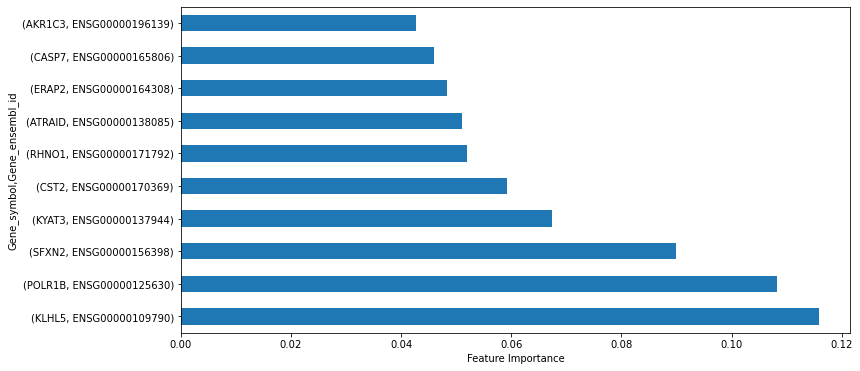

In [49]:
top_10_genes_cis = LR_model_features(X_develop_cis,y_develop_cis,best_params_cis,max_features=10)
top_10_genes_cis
